# Milestone 1

---

Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Full Time Program khususnya pada Artificial Neural Network.

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

### Dataset

Pada project ini dataset yang digunakan data customer dari sebuah perusahaan. Dataset ini berisi 7043 baris dengan 21 kolom yang diantaranya adalah customerID, gender, seniorCitizen, partner, dependents, dan masih banyak lagi. Dataset dapat dilihat di [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn).

Keterangan dari kolom dataset adalah:

| Feature          | Description                                                                                                        |
| ---------------- | ------------------------------------------------------------------------------------------------------------------ |
| customerID       | Customer ID                                                                                                        |
| gender           | Whether the customer is a male or a female                                                                         |
| SeniorCitizen    | Whether the customer is a senior citizen or not (1, 0)                                                             |
| Partner          | Whether the customer has a partner or not (Yes, No)                                                                |
| Dependents       | Whether the customer has dependents or not (Yes, No)                                                               |
| tenure           | Number of months the customer has stayed with the company                                                          |
| PhoneService     | Whether the customer has a phone service or not (Yes, No)                                                          |
| MultipleLines    | Whether the customer has multiple lines or not (Yes, No, No phone service)                                         |
| InternetService  | Customer’s internet service provider (DSL, Fiber optic, No)                                                        |
| OnlineSecurity   | Whether the customer has online security or not (Yes, No, No internet service)                                     |
| OnlineBackup     | Whether the customer has online backup or not (Yes, No, No internet service)                                       |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service)                                   |
| TechSupport      | Whether the customer has tech support or not (Yes, No, No internet service)                                        |
| StreamingTV      | Whether the customer has streaming TV or not (Yes, No, No internet service)                                        |
| StreamingMovies  | Whether the customer has streaming movies or not (Yes, No, No internet service)                                    |
| Contract         | The contract term of the customer (Month-to-month, One year, Two year)                                             |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No)                                                        |
| PaymentMethod    | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges   | The amount charged to the customer monthly                                                                         |
| TotalCharges     | The total amount charged to the customer                                                                           |
| Churn            | Whether the customer churned or not (Yes or No)                                                                    |

### Objectives

**Milestones 1** ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.

## Import Libraries

Pada project ini library yang digunakan adalah **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, **Scikit-Learn**, **TensorFlow**, dan **Keras**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

Melakukan setting agar pandas menampilkan seluruh kolom pada dataframe.

In [2]:
pd.set_option('display.max_columns', None)

## Data Loading

Membuat dataframe bernama `customer` dari file `WA_Fn-UseC_-Telco-Customer-Churn.csv`.

In [3]:
customer = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Characteristics

In [5]:
customer.shape

(7043, 21)

Dataset ini berisi **7043 baris** dan **21 kolom**.

In [6]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dari basic info diatas dapat diketahui bahwa dataset ini **tidak memiliki missing value** namun akan dilihat lebih lanjut pada bagian **data cleaning** dan dataset ini terdiri dari:
- 1 kolom bertipe data **float**
- 2 kolom bertipe data **integer**
- 18 kolom bertipe data **object** 

Namun, kolom `TotalCharges` ini memiliki tipe data **object** yang sebenernya kolom ini berupa value numeric (**float**) maka akan dilakukan pengubahan tipe data pada bagian data cleaning.

In [7]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Jika dilihat dari summary statistics di atas kolom `tenure` dan `MonthlyCharges` memiliki distribusi yang **Skewed** karena nilai mean dan mediannya tidak sama.

## Data Cleaning

### Change Data Type

Pada bagian ini akan dilakukan pengubahan tipe data pada kolom `TotalCharges`.

In [8]:
customer['TotalCharges'] = customer.TotalCharges.replace(' ', np.nan) # replace empty space with NaN

In [9]:
customer['TotalCharges'] = customer.TotalCharges.astype(float) # convert to float

### Missing Value

Pada bagian ini akan dilakukan pencekan terhadap missing value pada dataset.

In [10]:
customer.isna().mean()

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

Karena persentase missing value ini sangat kecil, maka missing value ini akan di drop dari dataframe.

In [11]:
customer = customer.dropna()

In [12]:
customer.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Duplicated Data

Pada bagian ini akan dilakukan pengecekan apakah terdapat duplicated data pada dataset.

In [13]:
customer.duplicated().sum()

0

Dari hasil pengecekan, **tidak terdapat duplicated data** pada dataset.

### Column Drop

Pada bagian ini akan menghapus kolom `customerID` karena diasumsikan bahwa kolom ini tidak akan menjadi feature.

In [14]:
customer = customer.drop(columns=['customerID'])

In [15]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


## Exploratory Data Analysis (EDA)

### Churn

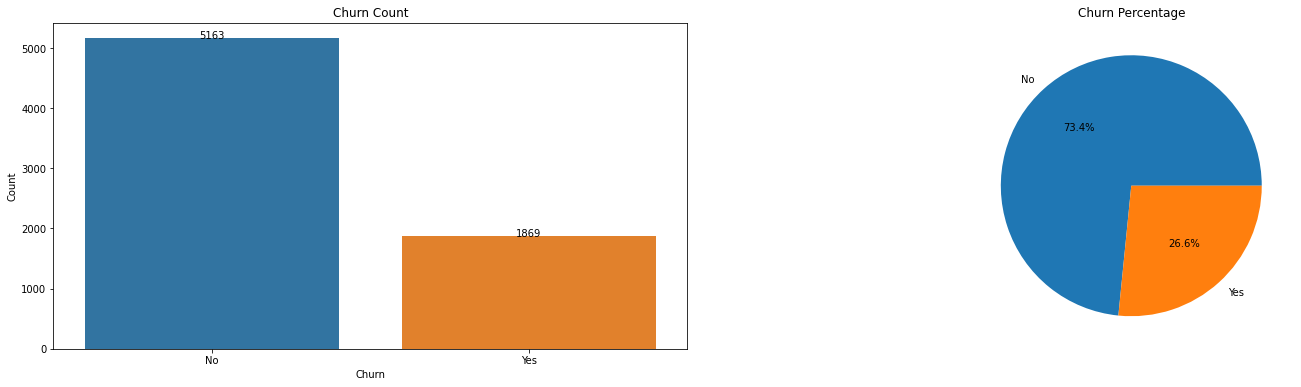

In [16]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='Churn', data=customer)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(customer.Churn.value_counts(), labels=customer.Churn.value_counts().index, autopct='%1.1f%%')
plt.title('Churn Percentage')
plt.show()

Ada sekitar **1869 customer** atau sekitar **27%** dari customer yang churn atau meninggalkan perusahaan.

### Gender

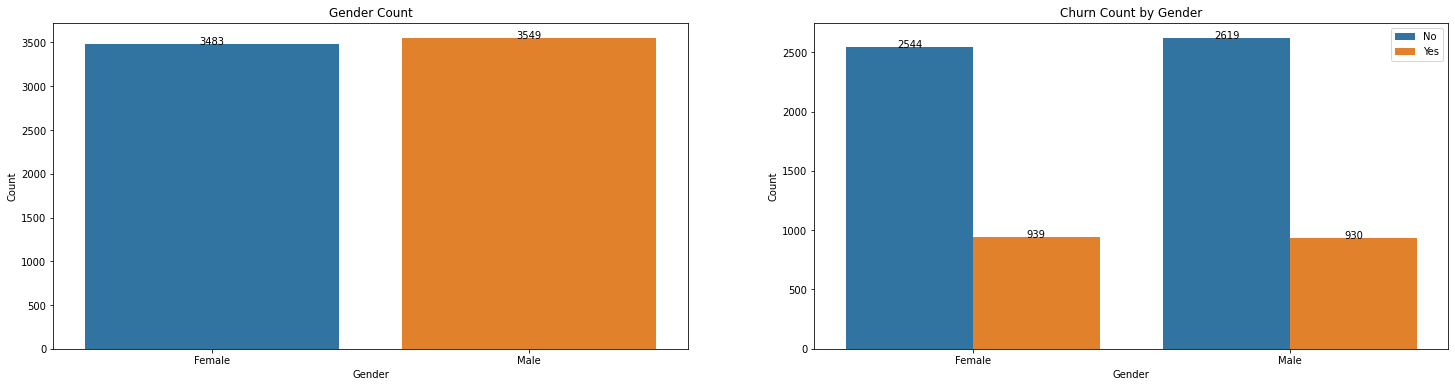

In [17]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='gender', data=customer)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
fig = sns.countplot(x='gender', data=customer, hue='Churn')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Churn Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()
plt.show()

Jumlah dari customer pria ataupun wanita tidak memiliki perbedaan yang signifikan, dan jika dilihat sepertinya `gender` ini tidak mempengaruhi `Churn` karena dari bar plot jumlah customer pria dan wanita yang churn ini hampir sama.

### Senior Citizen

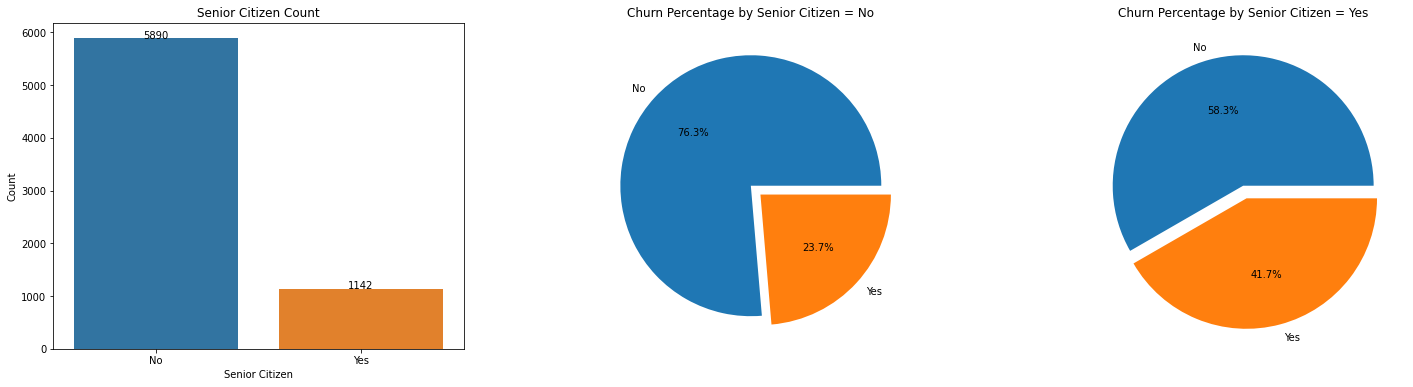

In [18]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='SeniorCitizen', data=customer)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Senior Citizen Count')
plt.xlabel('Senior Citizen')
fig.set_xticklabels(['No', 'Yes'])
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.pie(customer[customer.SeniorCitizen == 0].Churn.value_counts(), labels=customer[customer.SeniorCitizen == 0].Churn.value_counts().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Senior Citizen = No')
plt.subplot(1, 3, 3)
plt.pie(customer[customer.SeniorCitizen == 1].Churn.value_counts(), labels=customer[customer.SeniorCitizen == 1].Churn.value_counts().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Senior Citizen = Yes')
plt.show()

Ada sekitar 1142 customer yang merupakan customer lanjut usia dan jika dilihat dari persentasenya dapat diketahui bahwa customer lanjut usia ini lebih cenderung churn dibandingkan customer yang bukan lanjut usia.

### Partner

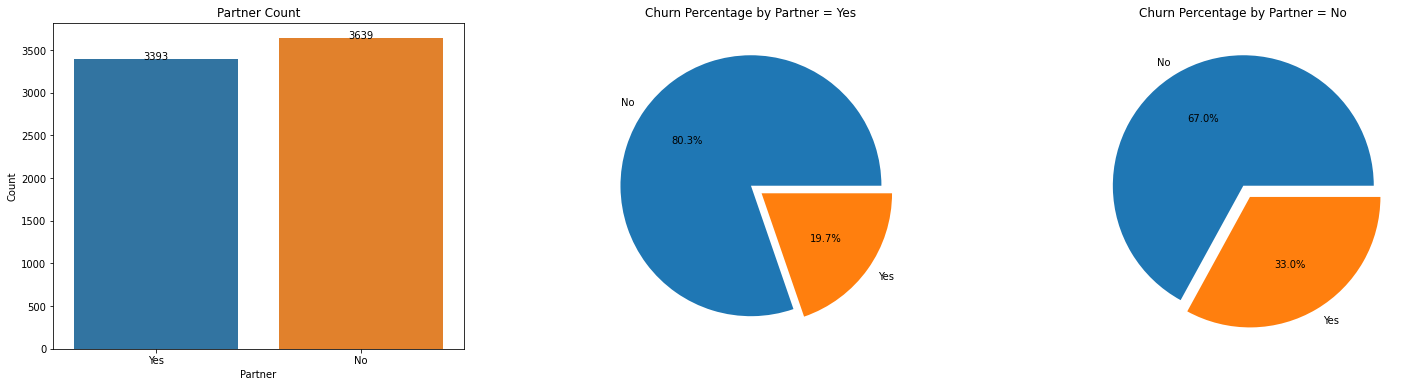

In [25]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='Partner', data=customer)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Partner Count')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.pie(customer[customer.Partner == 'Yes'].Churn.value_counts(), labels=customer[customer.Partner == 'Yes'].Churn.value_counts().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Partner = Yes')
plt.subplot(1, 3, 3)
plt.pie(customer[customer.Partner == 'No'].Churn.value_counts(), labels=customer[customer.Partner == 'No'].Churn.value_counts().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Partner = No')
plt.show()

Ada **3393 customer** yang memiliki pasangan dan ada **3639 customer** yang tidak memiliki pasangan. Namun jika dilihat dari persentasenya, klien yang tidak memiliki pasangan cenderung lebih untuk churn ketimbang klien yang memiliki pasangan.

### Dependents

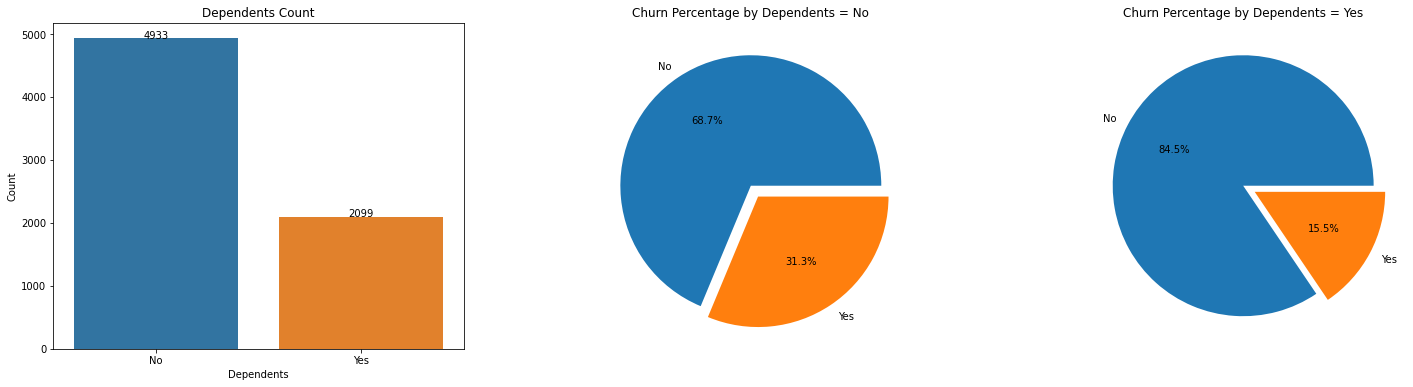

In [28]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='Dependents', data=customer)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:1.0f}'.format(height), ha="center")
plt.title('Dependents Count')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.pie(customer[customer.Dependents == 'No'].Churn.value_counts(), labels=customer[customer.Dependents == 'No'].Churn.value_counts().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Dependents = No')
plt.subplot(1, 3, 3)
plt.pie(customer[customer.Dependents == 'Yes'].Churn.value_counts(), labels=customer[customer.Dependents == 'Yes'].Churn.value_counts().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Churn Percentage by Dependents = Yes')
plt.show()

Ada sekitar **2099 customer** yang tidak memiliki tanggungan dan sama seperti kolom `Partner`, customer yang tidak memiliki tanggungan ini lebih cenderung untuk churn ketimbang customer yang memiliki tanggungan.

### Tenure

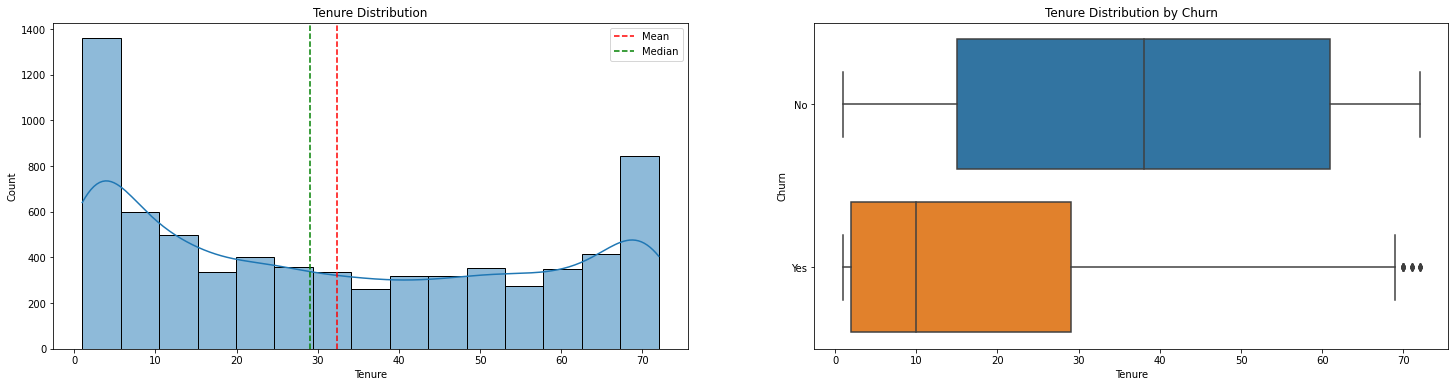

Skewness: 0.23773083190513133
Mean: 32
Median: 29.0
Min: 1
Max: 72


In [35]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='tenure', data=customer, kde=True)
plt.axvline(customer.tenure.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(customer.tenure.median(), color='g', linestyle='--', label='Median')
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='tenure', y='Churn', data=customer)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.show()
print(f'Skewness: {customer.tenure.skew()}')
print(f'Mean: {customer.tenure.mean():.0f}')
print(f'Median: {customer.tenure.median()}')
print(f'Min: {customer.tenure.min()}')
print(f'Max: {customer.tenure.max()}')

`Tenure` ini adalah berapa lama customer tinggal di perusahaan ini, rata-rata customer memiliki tenure selama **32 bulan** dengan tenure paling cepat adalah **1 bulan** dan yang paling lama adalah **72 bulan**. Dan jika dilihat dari boxplot customer yang tidak churn adalah customer yang sudah lama tinggal di perusahaan sedangkan customer yang churn adalah customer yang baru, namun ada juga customer lama yang akhirnya churn.